In [6]:
import sys

sys.path.append("../")

In [9]:
import matrix_ops as mo
from typing import Callable
import numpy as np
import time
import matplotlib.pyplot as plt

sizes = [pow(2, i) for i in range(10)]

def time_it(f: Callable, *args) -> tuple[float, ...]:
    start = time.time()
    res = f(*args)
    ellapsed_time = time.time() - start
    return ellapsed_time, res


binet_time = []
strassen_time = []
hybrid_time = []
regular_time = []

for size in sizes:
    mat1 = mo.createRandomMatrix(size, size)
    mat2 = mo.createRandomMatrix(size, size)

    res_binet, mat_binet = time_it(mo.binet, mat1, mat2)
    binet_time.append(res_binet)

    res_strassen, mat_strassen = time_it(mo.strassen, mat1, mat2)
    strassen_time.append(res_strassen)

    res_hybrid, mat_hybrid = time_it(mo.hybrid, mat1, mat2, size // 2)
    hybrid_time.append(res_hybrid)

    res_regular, mat_regular = time_it(mo.Matrix.__matmul__, mat1, mat2)
    regular_time.append(res_regular)


    assert np.allclose(mo.matrixToNumpy(mat_binet), mo.matrixToNumpy(mat_strassen)), "Matrices differ"
    assert np.allclose(mo.matrixToNumpy(mat_strassen), mo.matrixToNumpy(mat_hybrid)), "Matrices differ"
    assert np.allclose(mo.matrixToNumpy(mat_hybrid), mo.matrixToNumpy(mat_regular)), "Matrices differ"
    


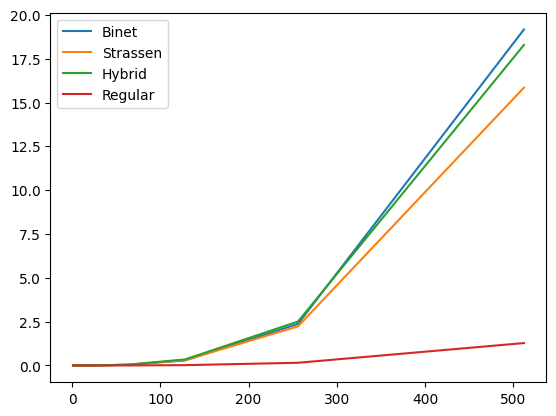

In [10]:

plt.plot(sizes, binet_time, label="Binet")
plt.plot(sizes, strassen_time, label="Strassen")
plt.plot(sizes, hybrid_time, label="Hybrid")
plt.plot(sizes, regular_time, label="Regular")

plt.legend()
plt.show()